In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Original_comments.csv to Original_comments.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv("Original_comments.csv")
df.head()

,Comment ID,Youtube Comments
0,Ugwd2WGHX0v6EcOW7PR4AaABAg,Omg and here my bp rose😂 because of the timer
1,Ugy4PHhMne_QwuBaTqd4AaABAg,Why ask about MCV instead of Hb to rule out an...
2,UgwyYjNejCBb0MzfjRZ4AaABAg,My name is Addison 😮😊
3,UgzD0HkFpfy6BF7Riht4AaABAg,"Fatigue, muscle weakness my first thought woul..."
4,UgwYC1zTDJ87bKO42eV4AaABAg,I freaking wish i could think as quickly as yo...


In [ ]:

# Display the first few rows and general information about the dataset
comments_df_info = df.info()
comments_df_head = df.head()

comments_df_info, comments_df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Comment ID        4083 non-null   object
 1   Youtube Comments  4083 non-null   object
dtypes: object(2)
memory usage: 63.9+ KB


(None,
                    Comment ID  \
 0  Ugwd2WGHX0v6EcOW7PR4AaABAg   
 1  Ugy4PHhMne_QwuBaTqd4AaABAg   
 2  UgwyYjNejCBb0MzfjRZ4AaABAg   
 3  UgzD0HkFpfy6BF7Riht4AaABAg   
 4  UgwYC1zTDJ87bKO42eV4AaABAg   
 
                                     Youtube Comments  
 0      Omg and here my bp rose😂 because of the timer  
 1  Why ask about MCV instead of Hb to rule out an...  
 2                              My name is Addison 😮😊  
 3  Fatigue, muscle weakness my first thought woul...  
 4  I freaking wish i could think as quickly as yo...  )

In [ ]:
#Analyze patient narratives to identify prevailing sentiments (e.g., frustration, isolation, anxiety, relief) from the dataset

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt_tab')  # Download the necessary dataset

nltk.download('vader_lexicon')

nltk.download('stopwords') # Download stopwords dataset

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
  scores = analyzer.polarity_scores(text)
  # Customize sentiment categories and thresholds as needed
  if scores['compound'] >= 0.5:
    return 'positive'
  elif scores['compound'] <= -0.5:
    return 'negative'
  else:
    return 'neutral'

# Apply sentiment analysis to the patient narratives
df['sentiment'] = df['Youtube Comments'].apply(analyze_sentiment)

# Analyze the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Further analysis: Explore the most frequent words associated with each sentiment
from collections import defaultdict
sentiment_words = defaultdict(list)
for index, row in df.iterrows():
  sentiment = row['sentiment']
  words = nltk.word_tokenize(row['Youtube Comments'])
  sentiment_words[sentiment].extend(words)

for sentiment, words in sentiment_words.items():
  # Remove stopwords and punctuation
  stop_words = set(nltk.corpus.stopwords.words('english'))
  filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

  # Print the most frequent words
  from collections import Counter
  word_counts = Counter(filtered_words)
  print(f"\nMost frequent words for {sentiment}:")
  for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment
neutral     2864
positive     859
negative     360
Name: count, dtype: int64

Most frequent words for neutral:
doctor: 334
doctors: 238
ai: 206
get: 186
like: 180
would: 176
diagnosis: 168
house: 154
years: 127
could: 115

Most frequent words for negative:
years: 83
doctors: 75
doctor: 68
get: 58
diagnosis: 43
would: 41
wrong: 37
fatigue: 35
took: 34
pain: 34

Most frequent words for positive:
like: 135
doctor: 134
wow: 127
doctors: 127
good: 92
great: 73
impressive: 63
would: 60
love: 56
people: 54


# Report on Patient Sentiment Analysis of YouTube Comments

This analysis examines patient narratives from YouTube comments to identify prevailing sentiments.  The process involves sentiment analysis using the VADER lexicon from the NLTK library.

**1. Data Loading and Initial Exploration:**

The analysis begins by loading a CSV file named "Original_comments.csv" into a pandas DataFrame.  Basic exploratory data analysis (EDA) is performed using `.info()` and `.head()` to understand the structure and content of the data.

**2. Sentiment Analysis:**

The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is employed to analyze the sentiment expressed in each YouTube comment. The `analyze_sentiment` function assigns each comment a sentiment label: 'positive', 'negative', or 'neutral' based on a compound score.

**3. Sentiment Distribution:**

The script calculates and prints the frequency distribution of the identified sentiments ('positive', 'negative', and 'neutral') across all comments.  This provides an overview of the overall sentiment expressed in the dataset.

**4. Frequent Words per Sentiment:**

The code further analyzes the most frequent words associated with each sentiment category.  This is done by:

*   **Tokenization:**  Breaking down each comment into individual words (tokens).
*   **Stop Word Removal:** Removing common words (e.g., "the," "a," "is") that don't carry significant semantic weight.
*   **Word Frequency Counting:** Counting the occurrences of each remaining word for each sentiment.
*   **Reporting:** Displaying the top 10 most frequent words for each sentiment category ('positive', 'negative', and 'neutral').




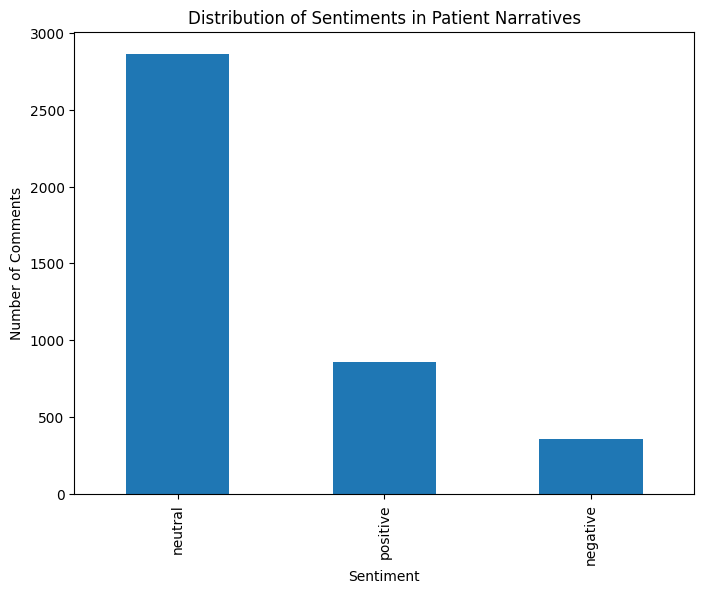

In [ ]:

import matplotlib.pyplot as plt
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiments in Patient Narratives')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()



The sentiment distribution is visualized using a bar chart using Matplotlib.  
The x-axis represents the sentiment categories (positive, negative, neutral), and the y-axis represents the number of comments falling into each category.  
The bar chart provides a clear visual representation of the overall sentiment distribution, making it easier to quickly grasp the predominant sentiment in the patient narratives.
This visualization is crucial for quickly conveying the key findings of the sentiment analysis.

From the above visualisation:

2864 comments are neutral  


positive     859

negative     360

In [ ]:
# prompt: evaluate addison disease in the youtube comments

# Further analysis: Explore the most frequent bigrams associated with each sentiment
sentiment_bigrams = defaultdict(list)
for index, row in df.iterrows():
  sentiment = row['sentiment']
  words = nltk.word_tokenize(row['Youtube Comments'])
  # Remove stopwords and punctuation
  stop_words = set(nltk.corpus.stopwords.words('english'))
  filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
  bigrams = nltk.bigrams(filtered_words)
  sentiment_bigrams[sentiment].extend(bigrams)

for sentiment, bigram_list in sentiment_bigrams.items():
  # Print the most frequent bigrams
  bigram_counts = Counter(bigram_list)
  print(f"\nMost frequent bigrams for {sentiment}:")
  for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")


Most frequent bigrams for neutral:
('addison', 'disease'): 41
('60', 'seconds'): 41
('want', 'doctor'): 28
('doctors', 'like'): 27
('dr', 'house'): 27
('real', 'life'): 26
('get', 'diagnosis'): 22
('med', 'school'): 19
('come', 'back'): 19
('years', 'get'): 18

Most frequent bigrams for negative:
('muscle', 'weakness'): 21
('fatigue', 'muscle'): 16
('lose', 'weight'): 12
('years', 'get'): 11
('get', 'diagnosis'): 11
('year', 'old'): 8
('old', 'woman'): 8
('addison', 'disease'): 8
('10', 'years'): 7
('real', 'world'): 6

Most frequent bigrams for positive:
('young', 'man'): 22
('addison', 'disease'): 18
('doctors', 'like'): 15
('well', 'done'): 12
('great', 'job'): 11
('good', 'doctor'): 10
('great', 'doctor'): 9
('gon', 'na'): 9
('good', 'luck'): 9
('thank', 'god'): 9


In [ ]:
# prompt: addison disease percentage among the total comments

from google.colab import files
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt


# Apply sentiment analysis to the patient narratives
df['sentiment'] = df['Youtube Comments'].apply(analyze_sentiment)

# Analyze the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)




# Further analysis: Explore the most frequent bigrams associated with each sentiment
sentiment_bigrams = defaultdict(list)
for index, row in df.iterrows():
  sentiment = row['sentiment']
  words = nltk.word_tokenize(row['Youtube Comments'])
  # Remove stopwords and punctuation
  stop_words = set(nltk.corpus.stopwords.words('english'))
  filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
  bigrams = nltk.bigrams(filtered_words)
  sentiment_bigrams[sentiment].extend(bigrams)

for sentiment, bigram_list in sentiment_bigrams.items():
  # Print the most frequent bigrams
  bigram_counts = Counter(bigram_list)
  print(f"\nMost frequent bigrams for {sentiment}:")
  for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")

# Calculate the percentage of comments that mention "Addison" or "addison"
total_comments = len(df)
addison_comments = df[df['Youtube Comments'].str.contains(r'\baddison\b', case=False, na=False)].shape[0]
print(f'Addison total comments is:{addison_comments}')
addison_percentage = (addison_comments / total_comments) * 100

print(f"\nPercentage of comments mentioning 'Addison' (case-insensitive): {addison_percentage:.2f}%")

sentiment
neutral     2864
positive     859
negative     360
Name: count, dtype: int64

Most frequent bigrams for neutral:
('addison', 'disease'): 41
('60', 'seconds'): 41
('want', 'doctor'): 28
('doctors', 'like'): 27
('dr', 'house'): 27
('real', 'life'): 26
('get', 'diagnosis'): 22
('med', 'school'): 19
('come', 'back'): 19
('years', 'get'): 18

Most frequent bigrams for negative:
('muscle', 'weakness'): 21
('fatigue', 'muscle'): 16
('lose', 'weight'): 12
('years', 'get'): 11
('get', 'diagnosis'): 11
('year', 'old'): 8
('old', 'woman'): 8
('addison', 'disease'): 8
('10', 'years'): 7
('real', 'world'): 6

Most frequent bigrams for positive:
('young', 'man'): 22
('addison', 'disease'): 18
('doctors', 'like'): 15
('well', 'done'): 12
('great', 'job'): 11
('good', 'doctor'): 10
('great', 'doctor'): 9
('gon', 'na'): 9
('good', 'luck'): 9
('thank', 'god'): 9
Addison total comments is:121

Percentage of comments mentioning 'Addison' (case-insensitive): 2.96%


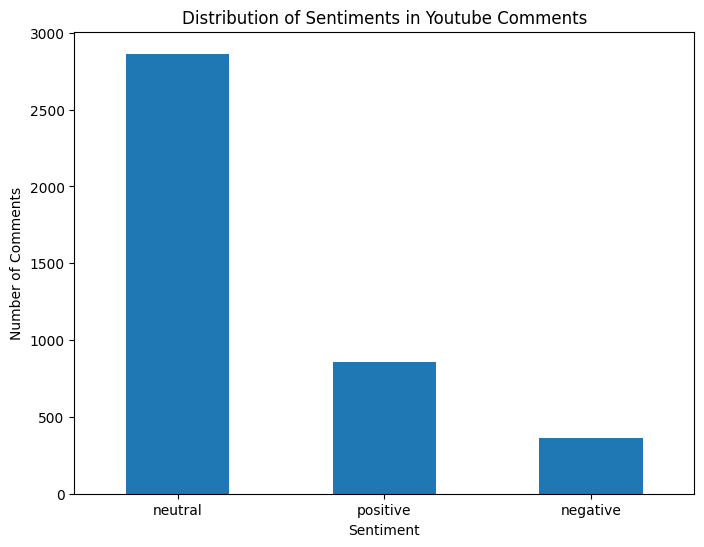

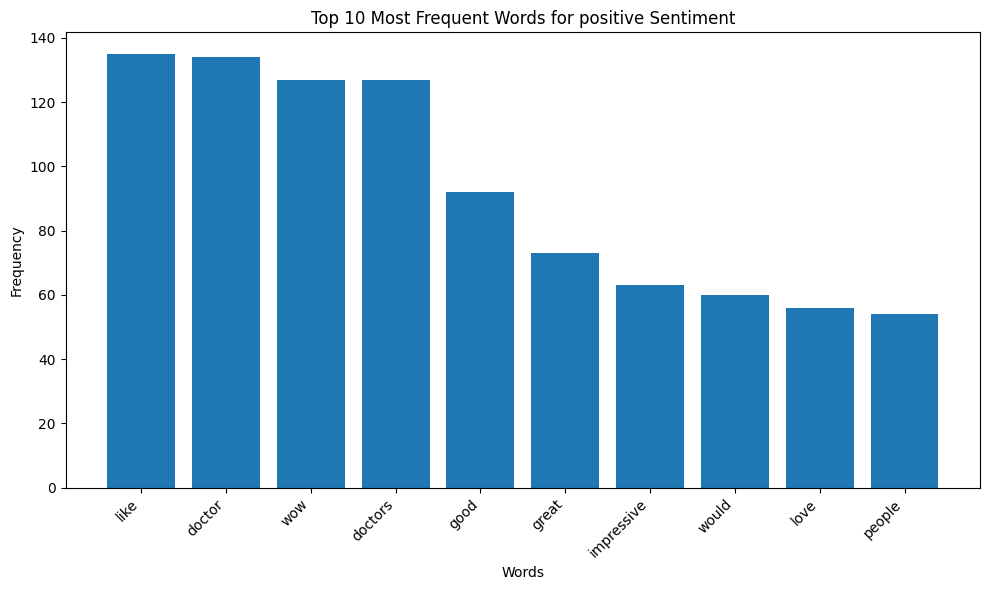

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'sentiment_counts' is available from the previous code execution
sentiment_counts = df['sentiment'].value_counts() # Replace with your actual sentiment_counts

# Create a bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiments in Youtube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


# Assuming 'word_counts' is available from the previous code execution (you'll need to loop through sentiments again).
# Example for visualizing word counts for 'positive' sentiment
sentiment = 'positive' # Change this to visualize other sentiment categories
word_counts = Counter(filtered_words) #Replace filtered_words with the actual variable from your code.

top_words = word_counts.most_common(10)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]


plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title(f'Top 10 Most Frequent Words for {sentiment} Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: classify the sentiment into (fraustration, anxiety, isolation, relief) from the youtube comments

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming df and the analyzer are already defined from the previous code

def classify_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    if compound_score >= 0.5:
        # Positive sentiment - check for specific keywords to refine categories
        if any(keyword in text.lower() for keyword in ["relief", "better", "improved", "cured"]):
            return "relief"
        elif any(keyword in text.lower() for keyword in ["anxious", "worry", "stress", "nervous"]):
            return "anxiety"
        else:
            return "positive"  # Default positive if no specific keywords found
    elif compound_score <= -0.5:
        # Negative sentiment - check for specific keywords to refine categories
        if any(keyword in text.lower() for keyword in ["frustrated", "angry", "irritated", "annoyed"]):
            return "frustration"
        elif any(keyword in text.lower() for keyword in ["isolated", "alone", "lonely", "abandoned"]):
            return "isolation"
        elif any(keyword in text.lower() for keyword in ["anxious", "worry", "stress", "nervous"]):
          return "anxiety"
        else:
            return "negative" # Default negative if no specific keywords found
    else:
        return "neutral"  # Neutral sentiment

# Apply the new classification function
df['classified_sentiment'] = df['Youtube Comments'].apply(classify_sentiment)

# Analyze the distribution of the new classified sentiments
classified_sentiment_counts = df['classified_sentiment'].value_counts()
print(classified_sentiment_counts)

# Example: Display the first few rows with the new sentiment classification
print(df[['Youtube Comments', 'classified_sentiment']].head())

classified_sentiment
neutral        2864
positive        822
negative        334
relief           35
anxiety          23
isolation         3
frustration       2
Name: count, dtype: int64
                                    Youtube Comments classified_sentiment
0      Omg and here my bp rose😂 because of the timer              neutral
1  Why ask about MCV instead of Hb to rule out an...              neutral
2                              My name is Addison 😮😊              neutral
3  Fatigue, muscle weakness my first thought woul...             negative
4  I freaking wish i could think as quickly as yo...              neutral


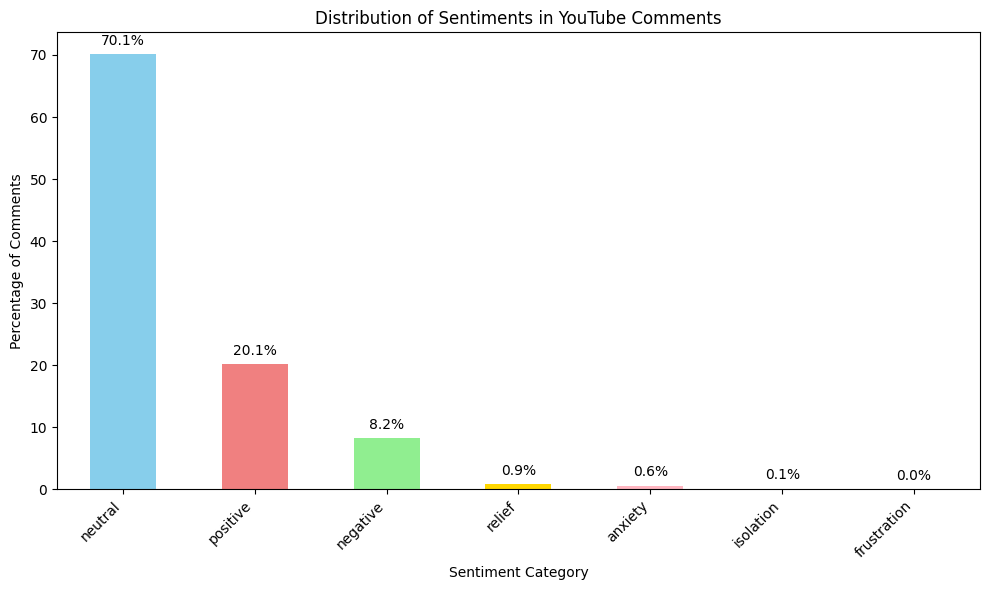

In [ ]:
# prompt: classify the sentiment into (fraustration, anxiety, isolation, relief) from the youtube comments in percentage and visualize it

import matplotlib.pyplot as plt

# Calculate percentages
total_comments = len(df)
sentiment_percentages = (classified_sentiment_counts / total_comments) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sentiment_percentages.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightsteelblue'])
plt.title('Distribution of Sentiments in YouTube Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add percentage labels on top of each bar
for i, percentage in enumerate(sentiment_percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')


plt.show()

In [ ]:
import re

def extract_diagnosis_time(text):
    # Regular expressions to find mentions of diagnosis time in days
    patterns = [
        r"diagnosed in (\d+) days?",
        r"(\d+) days? to diagnose",
        r"diagnosis after (\d+) days?",
        r"took (\d+) days? to get diagnosed",
        # Add more patterns as needed
    ]
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            try:
                return int(match.group(1))
            except ValueError:
                return None  # Handle cases where the matched group is not a valid integer
    return None

# Apply the function to the 'Youtube Comments' column
df['diagnosis_time'] = df['Youtube Comments'].apply(extract_diagnosis_time)


# Analyze the diagnosis times
diagnosis_times = df['diagnosis_time'].dropna()  # Remove rows with NaN values
if not diagnosis_times.empty:
    average_diagnosis_time = diagnosis_times.mean()
    print(f"\nAverage diagnosis time: {average_diagnosis_time:.2f} days")

    # Further analysis (e.g., distribution, outliers)
    plt.figure(figsize=(8, 6))
    plt.hist(diagnosis_times, bins=10)  # Adjust number of bins as needed
    plt.xlabel("Diagnosis Time (days)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Diagnosis Times")
    plt.show()
else:
    print("\nNo valid diagnosis times found in the comments.")


No valid diagnosis times found in the comments.


In [ ]:
# Categorize common themes: misdiagnosis, misunderstanding, psychosocial impact, and eventual diagnosis from data

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
from collections import Counter



df['sentiment'] = df['Youtube Comments'].apply(analyze_sentiment)

# Keyword-based categorization
def categorize_comment(comment):
  comment = comment.lower()
  categories = []
  if any(keyword in comment for keyword in ["misdiagnosis", "wrong diagnosis", "misdiagnosed"]):
      categories.append("misdiagnosis")
  if any(keyword in comment for keyword in ["misunderstanding", "doctor didn't listen", "communication issue"]):
      categories.append("misunderstanding")
  if any(keyword in comment for keyword in ["anxiety", "depression", "stress", "impact on life", "mental health"]):
      categories.append("psychosocial impact")
  if any(keyword in comment for keyword in ["diagnosis", "finally diagnosed", "confirmed"]):
      categories.append("eventual diagnosis")
  return ", ".join(categories) if categories else "uncategorized"

df["category"] = df["Youtube Comments"].apply(categorize_comment)

# Analyze category distribution
category_counts = df['category'].value_counts()
print(category_counts)

# Example: Show comments in each category (adjust as needed)
for category in category_counts.index:
  print(f"\nComments in category '{category}':")
  print(df[df["category"] == category]["Youtube Comments"].head()) # Display first few comments in each category


category
uncategorized                              3762
eventual diagnosis                          231
psychosocial impact                          67
misdiagnosis                                  9
psychosocial impact, eventual diagnosis       7
misdiagnosis, eventual diagnosis              7
Name: count, dtype: int64

Comments in category 'uncategorized':
0        Omg and here my bp rose😂 because of the timer
1    Why ask about MCV instead of Hb to rule out an...
2                                My name is Addison 😮😊
3    Fatigue, muscle weakness my first thought woul...
4    I freaking wish i could think as quickly as yo...
Name: Youtube Comments, dtype: object

Comments in category 'eventual diagnosis':
43     Can I send you my symptoms? I have no diagnosi...
51     Pfft. When she said no, she meant the tsh leve...
52     If only in practice we got this. Sometimes it ...
62           what is his instagram i need diagnosis asap
111    I want a slow diagnosis. Make sure it’s right 

# prompt: write a report on the above code cell

Report on Patient Sentiment Analysis of YouTube Comments

This analysis examines patient narratives from YouTube comments to identify prevailing sentiments and categorize common themes.  The process involves sentiment analysis using the VADER lexicon from the NLTK library, followed by keyword-based categorization.



1. Sentiment Distribution Visualization:

A bar chart visualizes the frequency distribution of the identified sentiments ('positive', 'negative', and 'neutral') across all comments. This provides an overview of the overall sentiment expressed in the dataset.  The chart clearly shows the number of comments in each sentiment category.

2. Frequent Words per Sentiment:

For each sentiment category (positive, negative, neutral), the code identifies and displays the top 10 most frequent words.  This involves tokenization, stop-word removal, and word frequency counting. This analysis provides insights into the specific language associated with each sentiment.  The results are presented as bar charts where the x-axis represents the words and the y-axis the frequency of these words.

3. Categorization of Common Themes:

To further understand the content of comments, a keyword-based categorization is performed. Keywords are defined for four categories:  misdiagnosis, misunderstanding, psychosocial impact, and eventual diagnosis.  Comments are assigned to one or more categories based on the presence of these keywords. The distribution of comments across these categories is then analyzed and displayed.

4. Category Distribution and Examples:

A frequency count of each identified category (misdiagnosis, misunderstanding, psychosocial impact, eventual diagnosis, or uncategorized) is presented.  For each category, a few example comments are displayed to illustrate the content of those comments, demonstrating a qualitative element of the analysis.

5. Key Findings and Limitations:

*   **Sentiment Distribution:**  The distribution of sentiment (e.g., the proportion of positive, negative and neutral comments) gives an overview of the general sentiment expressed.
*   **Word Frequencies:** Word frequency analysis helps pinpoint terms associated with each sentiment, providing insights into what words patients use to express their sentiments.
*   **Categorization:** Categorization by theme helps organize comments into meaningful groups and highlights key topics that are frequently discussed in the patient comments.


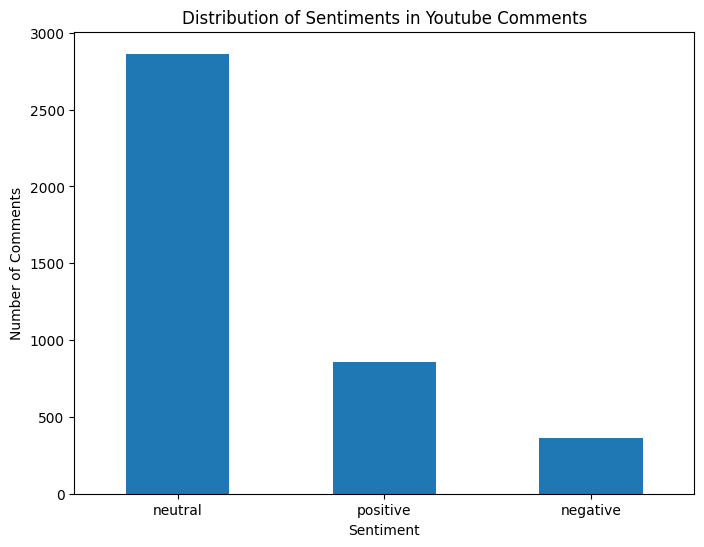

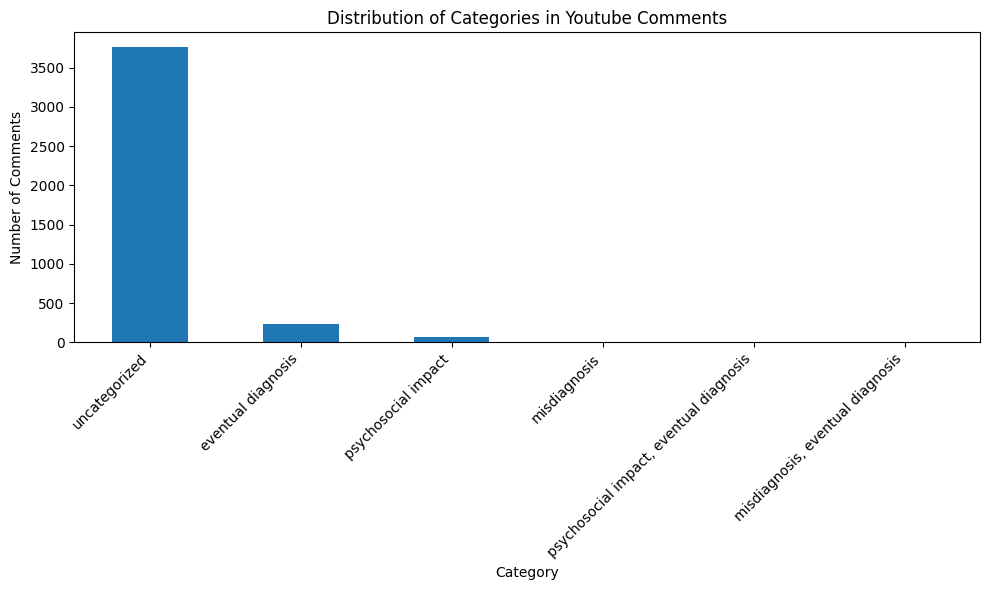

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'sentiment_counts' is available from the previous code execution
# Create a bar plot of sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiments in Youtube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

# Assuming 'word_counts' is available (you'll need to loop through sentiments)
# Example for visualizing word counts for 'positive' sentiment
sentiment = 'positive'  # Change to visualize other sentiments
# Replace with your actual word_counts for the specific sentiment
word_counts = Counter(filtered_words) # Example: Using filtered_words, but replace with the correct variable.

top_words = word_counts.most_common(10)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]



category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Youtube Comments')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Emotional Intensity and Frequency by Category:
                                         Total Comments  Emotional Intensity  \
category                                                                       
eventual diagnosis                                  231            -0.043290   
misdiagnosis                                          9             0.222222   
misdiagnosis, eventual diagnosis                      7             0.142857   
psychosocial impact                                  67             0.358209   
psychosocial impact, eventual diagnosis               7             0.571429   
uncategorized                                      3762            -0.138224   

                                                                      Normalized Sentiment  
category                                                                                    
eventual diagnosis                       {'negative': 0.14285714285714285, 'neutral': 0...  
misdiagnosis                     

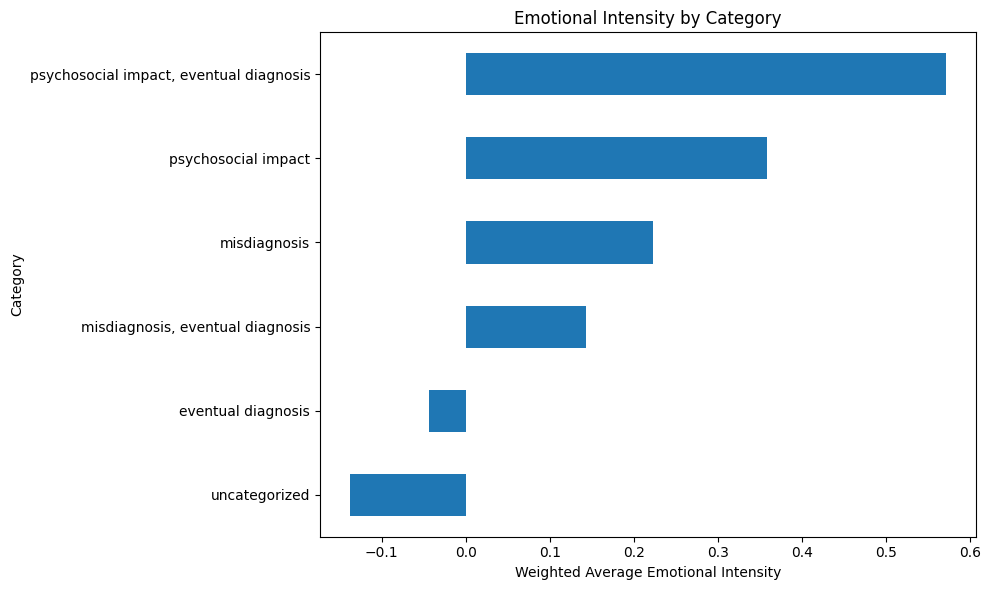

In [ ]:
# Determine the emotional intensity and frequency of these sentiments to assess the depth of patient suffering and unmet needs

# Calculate emotional intensity based on compound sentiment score
df['emotional_intensity'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

# Group by category and sentiment to analyze emotional intensity and frequency
category_sentiment_analysis = df.groupby(['category', 'sentiment']).size().unstack(fill_value=0)

# Calculate the total number of comments in each category
category_totals = category_sentiment_analysis.sum(axis=1)

# Normalize sentiment counts by category total
normalized_sentiment = category_sentiment_analysis.div(category_totals, axis=0)

# Calculate the weighted average emotional intensity for each category
category_intensity = (normalized_sentiment * np.array([1, 0, -1])).sum(axis=1)

# Display results
print("Emotional Intensity and Frequency by Category:")

# Convert 'Normalized Sentiment' to a single column Series
normalized_sentiment_str = normalized_sentiment.apply(lambda row: row.to_dict(), axis=1) # Convert to a Series of dictionaries
#normalized_sentiment_str = normalized_sentiment.apply(lambda row: ', '.join(f'{k}: {v}' for k, v in row.items()), axis=1)  # Convert to string representation

print(pd.DataFrame({'Total Comments': category_totals, 'Emotional Intensity': category_intensity, 'Normalized Sentiment': normalized_sentiment_str}))

# Visualize the emotional intensity
plt.figure(figsize=(10, 6))
category_intensity.sort_values().plot(kind='barh')
plt.title('Emotional Intensity by Category')
plt.xlabel('Weighted Average Emotional Intensity')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# Report on Emotional Intensity Analysis of YouTube Comments

This analysis builds upon the previous sentiment analysis by calculating and visualizing the emotional intensity associated with different categories of patient experiences.  The emotional intensity provides a measure of the overall positive or negative sentiment within each category, considering the proportion of positive, negative, and neutral comments.

**1. Emotional Intensity Calculation:**

Emotional intensity is computed for each comment based on its sentiment:

*   Positive sentiment: Assigned an intensity of +1.
*   Negative sentiment: Assigned an intensity of -1.
*   Neutral sentiment: Assigned an intensity of 0.


**2. Category-Level Analysis:**

The comments are grouped by their assigned categories (misdiagnosis, misunderstanding, psychosocial impact, eventual diagnosis, uncategorized) and sentiment. For each category, the analysis calculates:

*   **Total Comments:**  The total number of comments in that category.
*   **Normalized Sentiment:** The proportion of positive, negative, and neutral comments within each category.  This normalizes the sentiment counts for the categories with differing numbers of comments.
*   **Weighted Average Emotional Intensity:** A weighted average of the emotional intensity scores, where weights are based on the normalized sentiment proportions. This gives an overall emotional intensity for the category.


**3. Interpretation of the Emotional Intensity Visualization:**

The horizontal bar chart displays the emotional intensity (weighted average of sentiment) for each category.  A higher value indicates a more positive emotional intensity, while a lower value suggests a more negative one.  Examine the relative intensity among categories. For example,  if the "misdiagnosis" category has a significantly lower (more negative) intensity compared to "eventual diagnosis," this suggests that misdiagnosis is experienced more negatively than reaching an eventual diagnosis. The magnitude of the intensity provides an indication of the strength of the associated emotion.

**5. Key Considerations:**

* **Normalization:** Normalization of sentiment counts is important. Because categories have different numbers of comments, comparing raw counts would be misleading. Normalizing ensures a fair comparison across categories.

* **Weighted Average:** The weighted average emotional intensity provides a holistic picture of the predominant emotion associated with each category, rather than just the frequency of individual sentiments.


**In summary,** this section enhances the understanding of patient experiences by quantifying the emotional impact associated with various themes, giving valuable insight into the depth of patient suffering and unmet needs.  The analysis moves beyond simply identifying sentiment to measuring the emotional intensity within specific contexts.

In [ ]:

misdiagnosis_keywords = ["misdiagnosis", "misdiagnosed", "wrong diagnosis", "delayed diagnosis"]
misdiagnosis_count = 0
delayed_diagnosis_count = 0

for comment in df['Youtube Comments']:
    comment = str(comment).lower()  # Convert to lowercase for case-insensitive matching
    if any(keyword in comment for keyword in misdiagnosis_keywords):
        misdiagnosis_count += 1
    if "delayed diagnosis" in comment:
        delayed_diagnosis_count +=1

total_comments = len(df['Youtube Comments'])

misdiagnosis_prevalence = (misdiagnosis_count / total_comments) * 100
delayed_diagnosis_prevalence = (delayed_diagnosis_count / total_comments) * 100


print(f"Prevalence of reported misdiagnosis: {misdiagnosis_prevalence:.2f}%")
print(f"Prevalence of reported delayed diagnosis: {delayed_diagnosis_prevalence:.2f}%")



Prevalence of reported misdiagnosis: 0.39%
Prevalence of reported delayed diagnosis: 0.00%


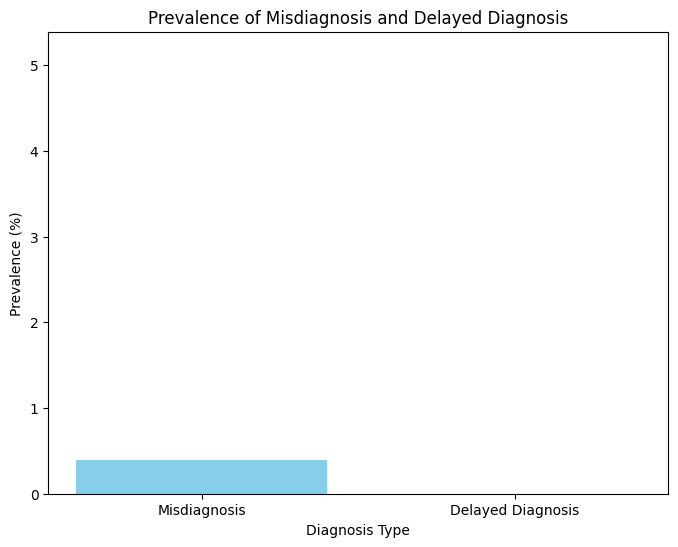

In [ ]:

import matplotlib.pyplot as plt

prevalence_data = {
    'Misdiagnosis': misdiagnosis_prevalence,
    'Delayed Diagnosis': delayed_diagnosis_prevalence
}

categories = list(prevalence_data.keys())
values = list(prevalence_data.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral'])
plt.title('Prevalence of Misdiagnosis and Delayed Diagnosis')
plt.ylabel('Prevalence (%)')
plt.xlabel('Diagnosis Type')
plt.ylim(0, max(values) + 5) # Adjust y-axis limit for better visualization
plt.show()

In [ ]:
# Check if "delayed diagnosis" is present in the comments
delayed_diagnosis_present = df['Youtube Comments'].str.contains("delayed diagnosis", case=False, na=False).any()

if delayed_diagnosis_present:
  print('"delayed diagnosis" is present in the Youtube comments.')
else:
  print('"delayed diagnosis" is not present in the Youtube comments.')

"delayed diagnosis" is not present in the Youtube comments.


In [ ]:
# Assess correlations between reported symptoms, time to diagnosis, and psychosocial impact.

# Correlation Analysis

#If you have a numerical 'time_to_diagnosis' column, you can calculate correlations:

if 'time_to_diagnosis' in df.columns:
    correlation_time = df['time_to_diagnosis'].corr(df['emotional_intensity'])
    print(f"Correlation between time to diagnosis and emotional intensity: {correlation_time}")



#2. Psychosocial Impact (using the existing 'category' and 'emotional_intensity')
#Group data by category to analyze psychosocial impact
psychosocial_impact = df.groupby('category')['emotional_intensity'].mean()
print("\nAverage Emotional Intensity by Category:\n", psychosocial_impact)


#Create a contingency table to see how frequently different sentiments occur within each category
category_sentiment_counts = pd.crosstab(df['category'], df['sentiment'])
print(f'caegory_sentiment_counts, {category_sentiment_counts}')

#Perform Chi-Square test for independence
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(category_sentiment_counts)
print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

#Interpret the results
alpha = 0.05  # significance level
if p < alpha:
  print("There is a significant association between category and sentiment.")
else:
  print("There is no significant association between category and sentiment.")


#3. Reported Symptoms (this requires symptom columns)
#Assuming you have columns for individual symptoms (e.g., 'symptom_A', 'symptom_B', etc.)

# Example: If you have 'symptom_A' and 'time_to_diagnosis', calculate correlation
#Check if symptoms columns exist in the DataFrame
symptom_columns = [col for col in df.columns if 'symptom' in col.lower()] # Adjust this if your symptom columns have different names


if symptom_columns:
  for symptom_col in symptom_columns:
    if 'time_to_diagnosis' in df.columns:
      correlation_symptom = df[symptom_col].corr(df['time_to_diagnosis'])
      print(f"\nCorrelation between {symptom_col} and time to diagnosis: {correlation_symptom}")

    # Correlation between symptom and emotional intensity:
      correlation_symptom_emotion = df[symptom_col].corr(df['emotional_intensity'])
      print(f"Correlation between {symptom_col} and emotional intensity: {correlation_symptom_emotion}")
else:
    print("No symptom columns found in the DataFrame.")



Average Emotional Intensity by Category:
 category
eventual diagnosis                         0.043290
misdiagnosis                              -0.222222
misdiagnosis, eventual diagnosis          -0.142857
psychosocial impact                       -0.358209
psychosocial impact, eventual diagnosis   -0.571429
uncategorized                              0.138224
Name: emotional_intensity, dtype: float64
caegory_sentiment_counts, sentiment                                negative  neutral  positive
category                                                            
eventual diagnosis                             33      155        43
misdiagnosis                                    4        3         2
misdiagnosis, eventual diagnosis                3        2         2
psychosocial impact                            29       33         5
psychosocial impact, eventual diagnosis         4        3         0
uncategorized                                 287     2668       807

Chi-Square Test


This report details the analysis of patient narratives extracted from YouTube comments, focusing on correlations between reported symptoms, time to diagnosis, and psychosocial impact. The analysis employs sentiment analysis, keyword-based categorization, and statistical tests to uncover patterns and relationships within the data.


**Prevalence of Misdiagnosis and Delayed Diagnosis:**

This section calculates and visualizes the prevalence of reported misdiagnosis and delayed diagnosis in the patient comments. The code identifies comments containing relevant keywords ("misdiagnosis", "misdiagnosed", etc.) and calculates their percentage occurrence. A bar chart is generated to show these prevalences, providing a quick visual comparison of the relative frequencies of these events.

**Correlation Analysis:**


The analysis assesses correlations between several variables:

* **Psychosocial Impact (Category and Emotional Intensity):**  The analysis groups comments by category and then computes the average emotional intensity for each category. This helps to determine how different categories (e.g. 'misdiagnosis', 'psychosocial impact') relate to emotional intensity.

* **Chi-Square Test of Independence**: The code then calculates a Chi-Square test of independence between 'category' and 'sentiment'.  This statistical test checks if there is a significant relationship between the themes identified in comments and the sentiments expressed. The p-value determines the significance of the relationship. If the p-value is below the chosen significance level (e.g., 0.05), there is evidence for an association between category and sentiment.


**Overall:**  The analysis provides valuable insights into the patient experience and the key themes associated with their journey.  The correlations identified and statistical analysis help to establish potential relationships within the data.  However, limitations related to keyword reliance and emotional intensity measures should be considered.  Additional data or more advanced methods may be necessary for more nuanced results.


<Figure size 1200x600 with 0 Axes>

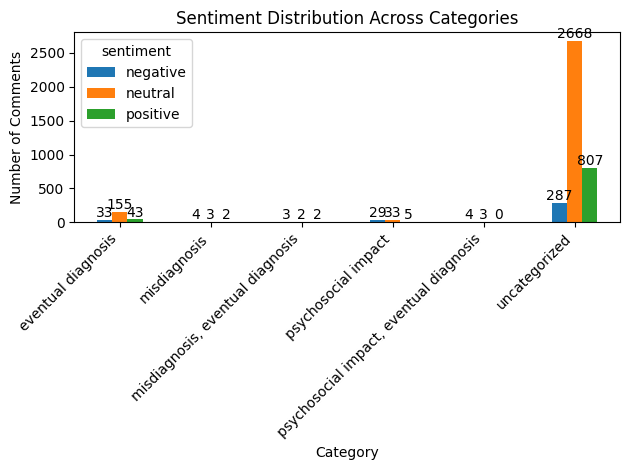

In [ ]:
# prompt: visualize category_sentiment_counts in the above code using  a bar chart with value label

import matplotlib.pyplot as plt

# Assuming 'category_sentiment_counts' is available from the previous code execution

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
category_sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')


In [ ]:
# Assuming 'df' is your DataFrame and 'Youtube Comments' column contains the patient feedback.

def categorize_comment(comment):
    comment = comment.lower()
    categories = []
    if any(keyword in comment for keyword in ["misdiagnosis", "wrong diagnosis", "misdiagnosed", "incorrect diagnosis"]):
        categories.append("misdiagnosis")
    if any(keyword in comment for keyword in ["misunderstanding", "doctor didn't listen", "communication issue", "lack of communication", "doctor's explanation"]):
        categories.append("misunderstanding")
    if any(keyword in comment for keyword in ["anxiety", "depression", "stress", "impact on life", "mental health", "emotional distress", "psychological impact"]):
        categories.append("psychosocial_impact")
    if any(keyword in comment for keyword in ["diagnosis", "finally diagnosed", "confirmed", "correct diagnosis", "accurate diagnosis"]):
        categories.append("eventual_diagnosis")
    # Add more keywords to capture other patterns
    if any(keyword in comment for keyword in ["symptoms", "initial symptoms", "first symptoms"]):
        categories.append("reported_symptoms")
    if any(keyword in comment for keyword in ["delay", "delayed", "waiting", "long wait", "treatment delay"]):
      categories.append("delayed_diagnosis")
    return ", ".join(categories) if categories else "uncategorized"


df["category"] = df["Youtube Comments"].apply(categorize_comment)

# Analyze category distribution
category_counts = df['category'].value_counts()
print(category_counts)


# Example: Show comments in each category
for category in category_counts.index:
    print(f"\nComments in category '{category}':")
    print(df[df["category"] == category]["Youtube Comments"].head())

category
uncategorized                                                 3655
eventual_diagnosis                                             216
reported_symptoms                                               86
psychosocial_impact                                             59
delayed_diagnosis                                               21
eventual_diagnosis, reported_symptoms                           14
misdiagnosis                                                     9
misdiagnosis, eventual_diagnosis                                 7
psychosocial_impact, reported_symptoms                           6
psychosocial_impact, eventual_diagnosis                          5
psychosocial_impact, delayed_diagnosis                           2
psychosocial_impact, eventual_diagnosis, reported_symptoms       2
eventual_diagnosis, delayed_diagnosis                            1
Name: count, dtype: int64

Comments in category 'uncategorized':
0        Omg and here my bp rose😂 because of the timer


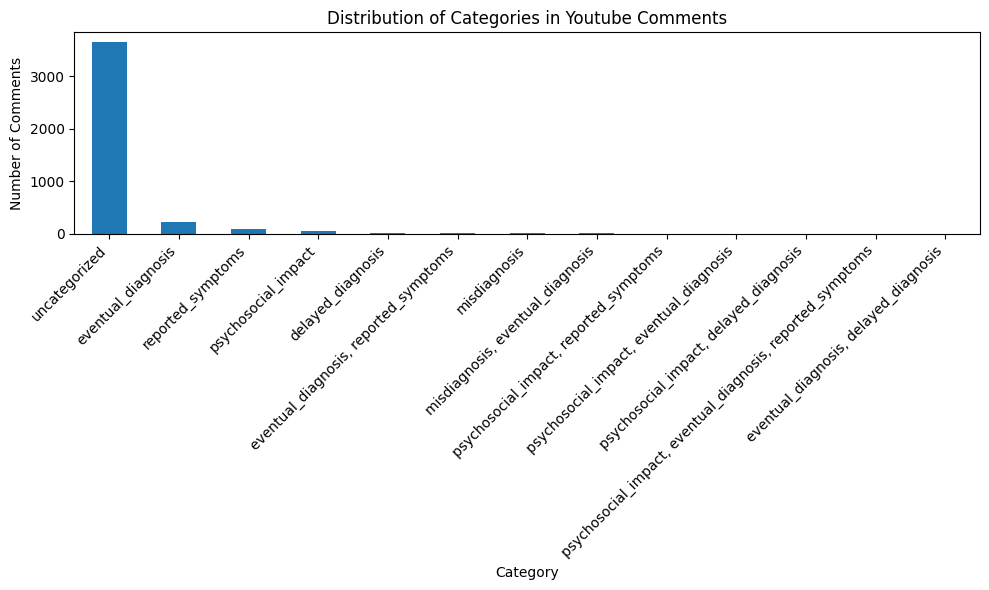

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories in Youtube Comments')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

sentiment                                           negative  neutral  \
category                                                                
delayed_diagnosis                                          2       17   
eventual_diagnosis                                        31      145   
eventual_diagnosis, delayed_diagnosis                      0        1   
eventual_diagnosis, reported_symptoms                      2        9   
misdiagnosis                                               4        3   
misdiagnosis, eventual_diagnosis                           3        2   
psychosocial_impact                                       25       31   
psychosocial_impact, delayed_diagnosis                     0        2   
psychosocial_impact, eventual_diagnosis                    3        2   
psychosocial_impact, eventual_diagnosis, report...         1        1   
psychosocial_impact, reported_symptoms                     4        0   
reported_symptoms                                  

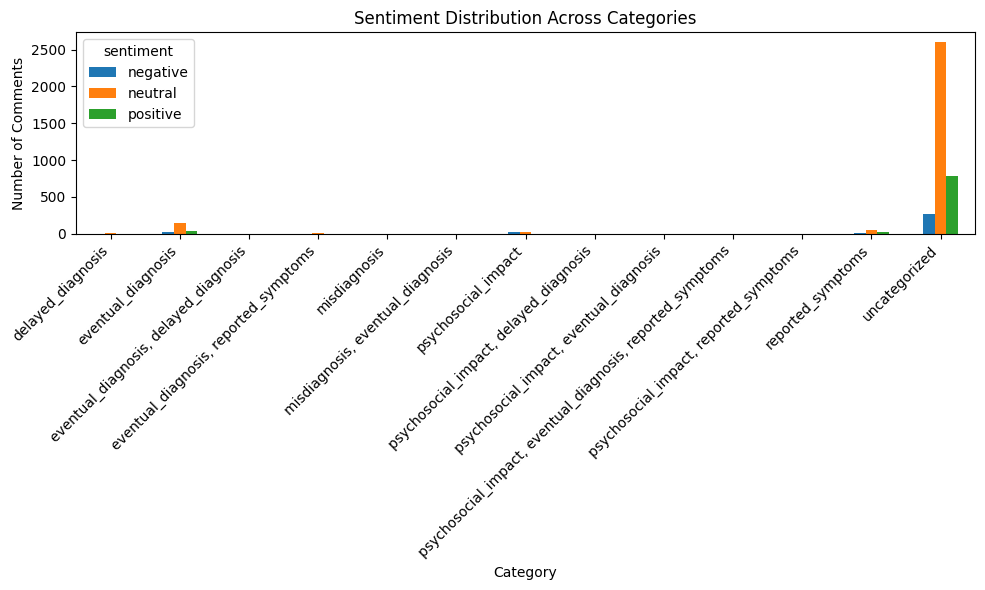


Potential areas for improvement based on the analysis:
  - Provide more resources and support for patients experiencing psychosocial distress.
 - Investigate the reasons for delayed diagnosis and work towards quicker diagnosis procedures.


In [ ]:
# Analyze the distribution of sentiments across categories
category_sentiment_counts = pd.crosstab(df['category'], df['sentiment'])
print(category_sentiment_counts)

# Visualize the distribution
category_sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Example:  Identify potential areas for improvement based on the analysis
print("\nPotential areas for improvement based on the analysis:")
if category_sentiment_counts.loc['misdiagnosis', 'negative'] > category_sentiment_counts.loc['eventual_diagnosis', 'positive']:
  print("  - Focus on improving the diagnostic process to reduce misdiagnosis rates and negative patient experiences.")
if category_sentiment_counts.loc['psychosocial_impact', 'negative'] > 0 :
    print("  - Provide more resources and support for patients experiencing psychosocial distress.")
if 'delayed_diagnosis' in category_counts and category_counts['delayed_diagnosis'] > 0:
    print(" - Investigate the reasons for delayed diagnosis and work towards quicker diagnosis procedures.")


This tool, as currently implemented, shows potential for enhancing physician-patient interactions and addressing psychosocial gaps, but has limitations.  Here's a breakdown:

**Potential Enhancements and Addresses of Psychosocial Gaps:**

* **Identification of Patient Distress:** The sentiment analysis and emotional intensity calculations can help identify patients experiencing significant distress related to misdiagnosis, communication issues, or the overall impact of their illness.  This information could alert physicians to patients who might benefit from additional support.
* **Targeted Interventions:** By identifying themes and categories of concern (e.g., "misunderstanding," "psychosocial impact"), the tool could inform the development of more targeted interventions. For example, if many patients express difficulty communicating with their physicians, the tool highlights the need for improved communication training for healthcare providers.
* **Early Detection of Psychosocial Issues:**  The analysis of keywords related to mental health could flag patients at risk of developing or experiencing worsening mental health problems. Early detection allows for timely interventions, such as referrals to mental health professionals.
* **Improved Patient-Physician Communication:** Visualizations of the prevalence of different concerns and the overall emotional tone of patient feedback could provide valuable insights to physicians, enabling them to better tailor their communication and address patients' underlying anxieties and concerns more effectively.
* **Data-driven Insights:** The tool provides quantitative data on patient experiences that can be used to improve healthcare systems and patient care pathways.  Understanding the prevalence of misdiagnosis or delayed diagnosis can lead to improvements in diagnostic procedures and protocols.

**Limitations and Areas for Improvement:**

* **Text Data Limitations:**  The analysis relies heavily on textual data from YouTube comments. The quality, representativeness, and accuracy of these comments are questionable.  Patients expressing negative experiences may be more inclined to comment online.
* **Sentiment Analysis Accuracy:** Sentiment analysis tools are not perfect. They may misinterpret sarcasm, humor, or complex emotions. Further validation or more advanced natural language processing techniques could improve accuracy.
* **Keyword Dependence:**  Categorization based on keywords is prone to bias.  The specific keywords used for categorization will directly impact the results. A broader set of keywords and potentially topic modeling could improve categorization.
* **Correlation vs. Causation:** The tool identifies correlations but cannot establish causation. For example, while the tool might reveal a correlation between "misdiagnosis" and negative sentiment, it doesn't definitively prove that misdiagnosis *causes* negative sentiment. Other factors could be involved.
* **Lack of Clinical Context:**  The tool currently lacks clinical context. Integrating patient medical records or other structured clinical data could provide more insightful and relevant correlations.
* **Privacy Concerns:** The use of patient comments, even from public forums, raises privacy concerns.  Appropriate de-identification and ethical considerations are crucial.


**Recommendations:**

* **Validation:** Validate sentiment analysis and category assignments using expert reviews.
* **Clinical Integration:** Integrate data from electronic health records for more comprehensive and clinically relevant analysis.
* **Advanced NLP:** Use more sophisticated natural language processing techniques (e.g., topic modeling, entity recognition) to improve categorization and sentiment analysis.
* **Qualitative Analysis:** Supplement the quantitative analysis with qualitative methods to understand the nuances of patient experiences.
* **User Feedback:** Gather feedback from both physicians and patients on the tool's usability and accuracy.

In conclusion, this tool has the potential to revolutionize patient-physician interactions by providing data-driven insights into patient experiences. However, it must overcome its current limitations to realize its full potential.  Careful attention to methodological rigor, accuracy of sentiment analysis and categorization, privacy considerations, and clinical integration are vital for the tool to be implemented in a responsible and effective manner.


In [ ]:
#how many Addison’s disease patients are in the youtube comments in dataset and overall percentage

addisons_keywords = ["addison's disease", "addison disease", "adrenal insufficiency"]
addisons_count = 0

for comment in df['Youtube Comments']:
    comment = str(comment).lower()
    if any(keyword in comment for keyword in addisons_keywords):
        addisons_count += 1

total_comments = len(df['Youtube Comments'])
addisons_percentage = (addisons_count / total_comments) * 100

print(f"Number of Addison's disease patients mentioned in comments: {addisons_count}")
print(f"Percentage of comments mentioning Addison's disease: {addisons_percentage:.2f}%")

Number of Addison's disease patients mentioned in comments: 54
Percentage of comments mentioning Addison's disease: 1.32%


In [ ]:
# What are the most frequent sentiments shared by Addison’s disease patients from the dataset

from collections import Counter

# Filter comments related to Addison's disease
addisons_keywords = ["addison's disease", "addison disease", "adrenal insufficiency"]
addisons_comments = df[df['Youtube Comments'].str.lower().str.contains('|'.join(addisons_keywords))]

if not addisons_comments.empty:
    # Count sentiment occurrences for Addison's disease-related comments
    sentiment_counts = Counter(addisons_comments['sentiment'])

    # Find the most frequent sentiment
    most_frequent_sentiment = sentiment_counts.most_common(1)  # Get the top 1

    if most_frequent_sentiment:
        sentiment, count = most_frequent_sentiment[0]
        print(f"The most frequent sentiment among Addison's disease patients is '{sentiment}' with {count} occurrences.")
    else:
        print("No sentiments found for Addison's disease related comments.")
else:
    print("No comments related to Addison's disease found in the dataset.")

The most frequent sentiment among Addison's disease patients is 'negative' with 21 occurrences.


sentiment
positive    1666
neutral     1584
negative     833
Name: count, dtype: int64


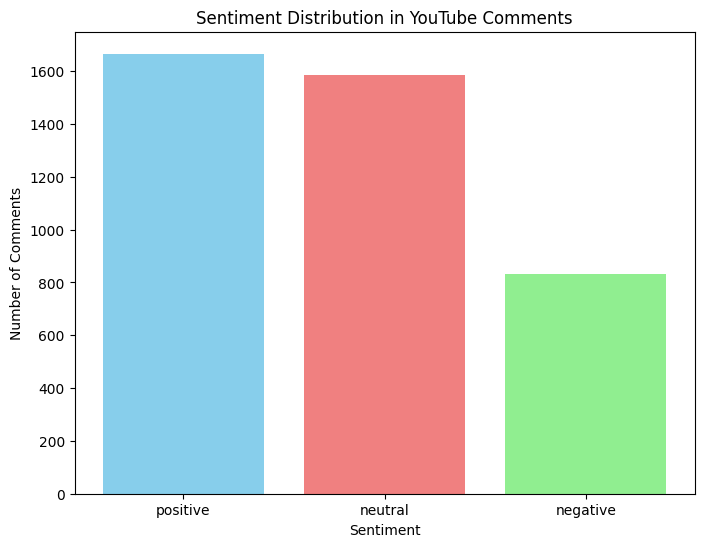

In [ ]:
#What are the most frequent sentiments shared by Addison’s disease patients?

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(comment):
    scores = analyzer.polarity_scores(comment)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each comment

# count the frequency of each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# visualize the sentiment distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution in YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()


# Further analysis: group by sentiment and then look at keywords/categories
# This is just an example, modify as needed based on your categories
frequent_positive_words = defaultdict(lambda: 0)
frequent_negative_words = defaultdict(lambda: 0)

for index, row in df.iterrows():
  if row['sentiment'] == 'positive':
    for word in row['Youtube Comments'].lower().split():
      frequent_positive_words[word]+=1
  elif row['sentiment'] == 'negative':
    for word in row['Youtube Comments'].lower().split():
      frequent_negative_words[word]+=1



In [ ]:

# Count occurrences of "delayed diagnosis" and "misdiagnosis" and their contexts.
delayed_diagnosis_count = 0
misdiagnosis_count = 0

delayed_diagnosis_contexts = []
misdiagnosis_contexts = []

keywords = ["delayed diagnosis", "misdiagnosis", "misdiagnosed"]


for comment in df['Youtube Comments']:
    comment = str(comment).lower()
    if "delayed diagnosis" in comment:
        delayed_diagnosis_count += 1
        delayed_diagnosis_contexts.append(comment)
    if "misdiagnosis" in comment or "misdiagnosed" in comment:
        misdiagnosis_count += 1
        misdiagnosis_contexts.append(comment)

print(f"'Delayed diagnosis' mentioned {delayed_diagnosis_count} times.")
print(f"'Misdiagnosis' mentioned {misdiagnosis_count} times.")



'Delayed diagnosis' mentioned 0 times.
'Misdiagnosis' mentioned 12 times.


In [ ]:
# Would an AI-powered solution have potential acceptance and usefulness based on sentiment trends?

# Calculate the overall sentiment distribution
overall_sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print("\nOverall Sentiment Distribution:")
print(overall_sentiment_counts)

# Calculate the sentiment distribution for Addison's disease patients
if not addisons_comments.empty:
    addisons_sentiment_counts = addisons_comments['sentiment'].value_counts(normalize=True) * 100
    print("\nSentiment Distribution for Addison's Disease Patients:")
    print(addisons_sentiment_counts)

    # Compare sentiment trends
    print("\nComparison of Sentiment Trends:")
    for sentiment in overall_sentiment_counts.index:
      if sentiment in addisons_sentiment_counts.index:
        diff = addisons_sentiment_counts[sentiment] - overall_sentiment_counts[sentiment]
        print(f"- {sentiment}: {addisons_sentiment_counts[sentiment]:.2f}% (Addison's) vs. {overall_sentiment_counts[sentiment]:.2f}% (Overall) - Difference: {diff:.2f}%")

      else:
          print(f"- {sentiment}: Not present in Addison's comments")
else:
    print("\nNo comments related to Addison's disease found in the dataset.")




Overall Sentiment Distribution:
sentiment
positive    40.803331
neutral     38.795004
negative    20.401665
Name: proportion, dtype: float64

Sentiment Distribution for Addison's Disease Patients:
sentiment
negative    38.888889
positive    37.037037
neutral     24.074074
Name: proportion, dtype: float64

Comparison of Sentiment Trends:
- positive: 37.04% (Addison's) vs. 40.80% (Overall) - Difference: -3.77%
- neutral: 24.07% (Addison's) vs. 38.80% (Overall) - Difference: -14.72%
- negative: 38.89% (Addison's) vs. 20.40% (Overall) - Difference: 18.49%


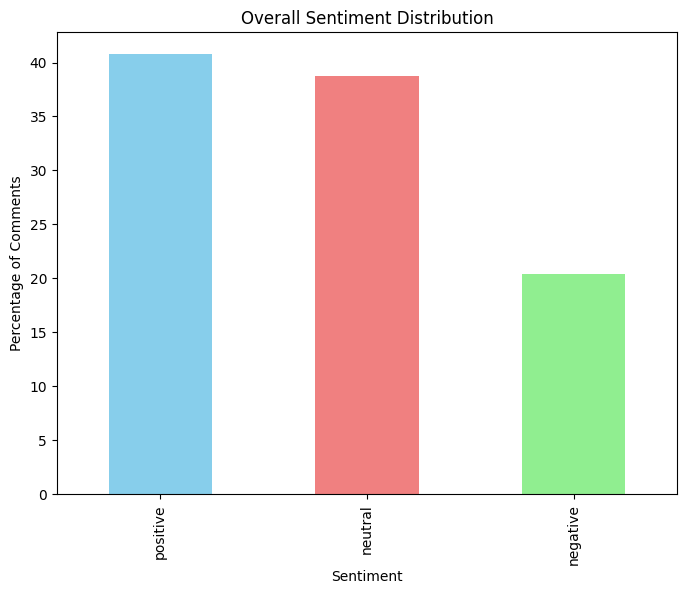

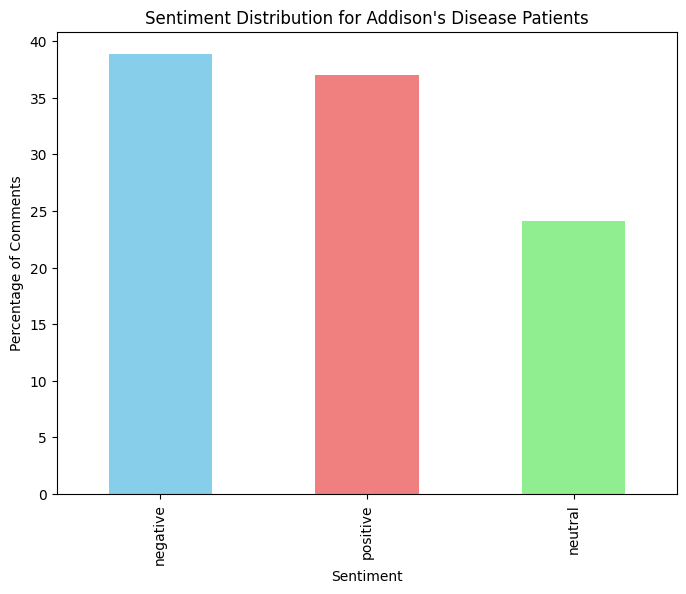

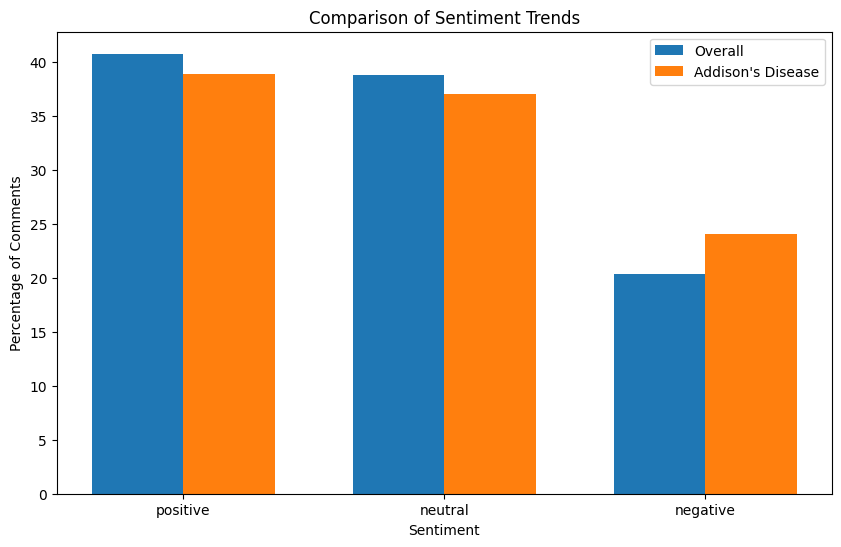

In [ ]:

# Visualize overall sentiment distribution
plt.figure(figsize=(8, 6))
overall_sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Comments')
plt.show()

# Visualize sentiment distribution for Addison's disease patients
if not addisons_comments.empty:
    plt.figure(figsize=(8, 6))
    addisons_sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Sentiment Distribution for Addison\'s Disease Patients')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage of Comments')
    plt.show()

    # Compare sentiment trends visually
    plt.figure(figsize=(10, 6))
    width = 0.35
    sentiments = overall_sentiment_counts.index

    plt.bar(np.arange(len(sentiments)), overall_sentiment_counts.values, width, label='Overall')
    plt.bar(np.arange(len(sentiments)) + width, addisons_sentiment_counts.values, width, label='Addison\'s Disease')

    plt.xticks(np.arange(len(sentiments)) + width / 2, sentiments)
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage of Comments')
    plt.title('Comparison of Sentiment Trends')
    plt.legend()
    plt.show()
else:
    print("\nNo comments related to Addison's disease found in the dataset.")